In [4]:
import numpy as np
from ddm_utils import prob_rt, calculate_histogram, parse_sim_results, simulate_ddm, prob_rt_a, prob_hit_low_bound
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from numba import jit
from scipy import integrate
import pickle

In [6]:
# params
bound_arr = np.array([2,10]); velocity_arr = np.array([-4,-3,-2,-1,0,1,2,3,4])

# Generating Data

In [ ]:
N_sim = 50000;all_sim_results = {}
for a in bound_arr:
    for v in velocity_arr:
        # if a == 10 and v == 0:
        #     continue
        keyname = f"a={str(a)},v={str(v)}"
        sim_results = Parallel(n_jobs=-1)(delayed(simulate_ddm)(v, a) for _ in range(N_sim))
        all_sim_results[keyname] = sim_results

        print('completed ', keyname)

with open('all_sim_results.pkl', 'wb') as f:
    pickle.dump(all_sim_results, f)

In [2]:
with open('all_sim_results.pkl', 'rb') as f:
    all_sim_results = pickle.load(f)

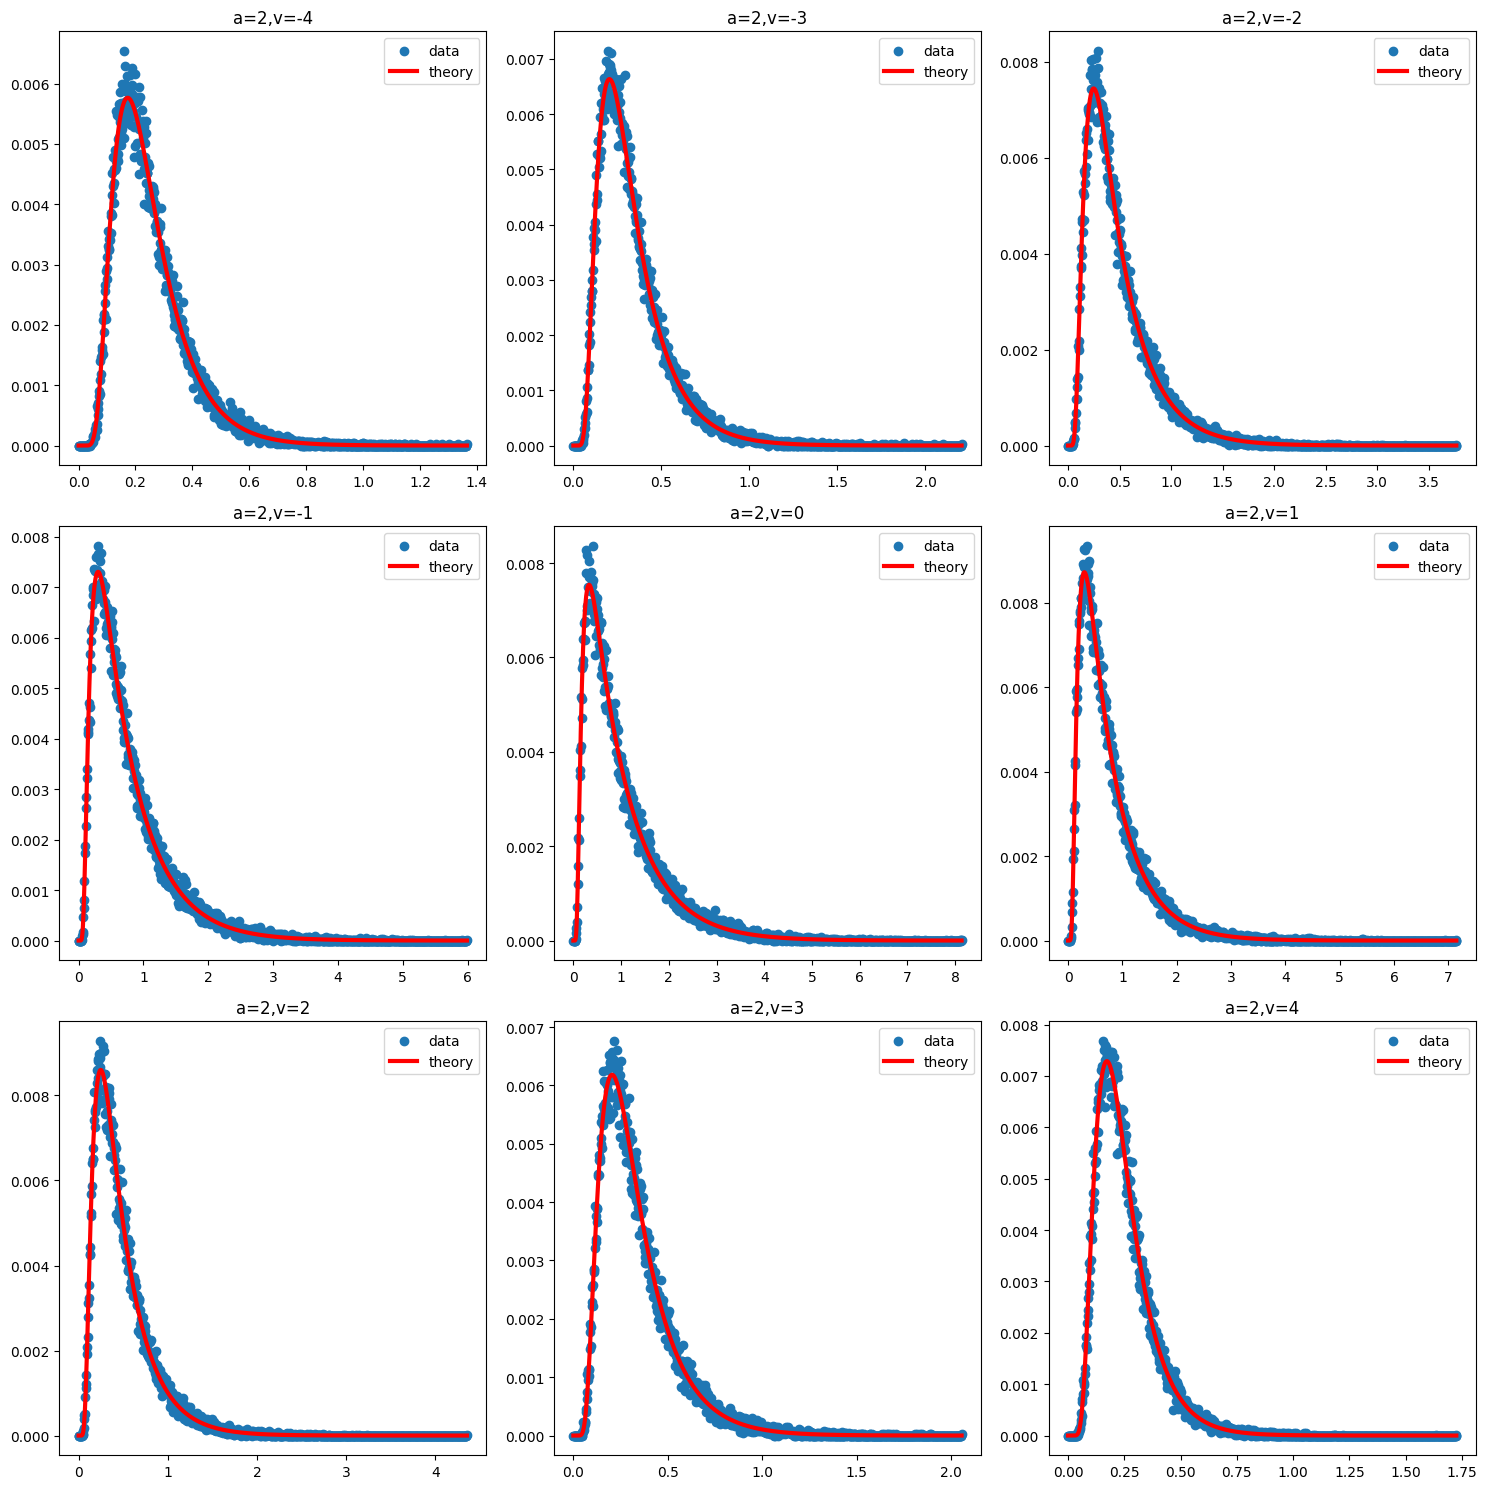

In [4]:
w = 0.5; K_max = 100
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
i = 0
for a in bound_arr:
    for v in velocity_arr:
        if a != 2:
            continue

        keyname = f"a={str(a)},v={str(v)}"
        choices, RTs = parse_sim_results(all_sim_results[keyname])        
        
        t_pts = np.linspace(0.0001, max(RTs), 1000)
        prob = calculate_histogram(t_pts, RTs)
        RT_theory = prob_rt(t_pts, v)

        axes[i//3, i%3].scatter(t_pts[:-1], prob); 
        axes[i//3, i%3].plot(t_pts[:-1], RT_theory,linewidth=3, color='red');
        axes[i//3, i%3].set_title(keyname); 
        axes[i//3, i%3].legend(['data', 'theory'])
        i += 1

plt.tight_layout()
plt.show()


# For a = 10



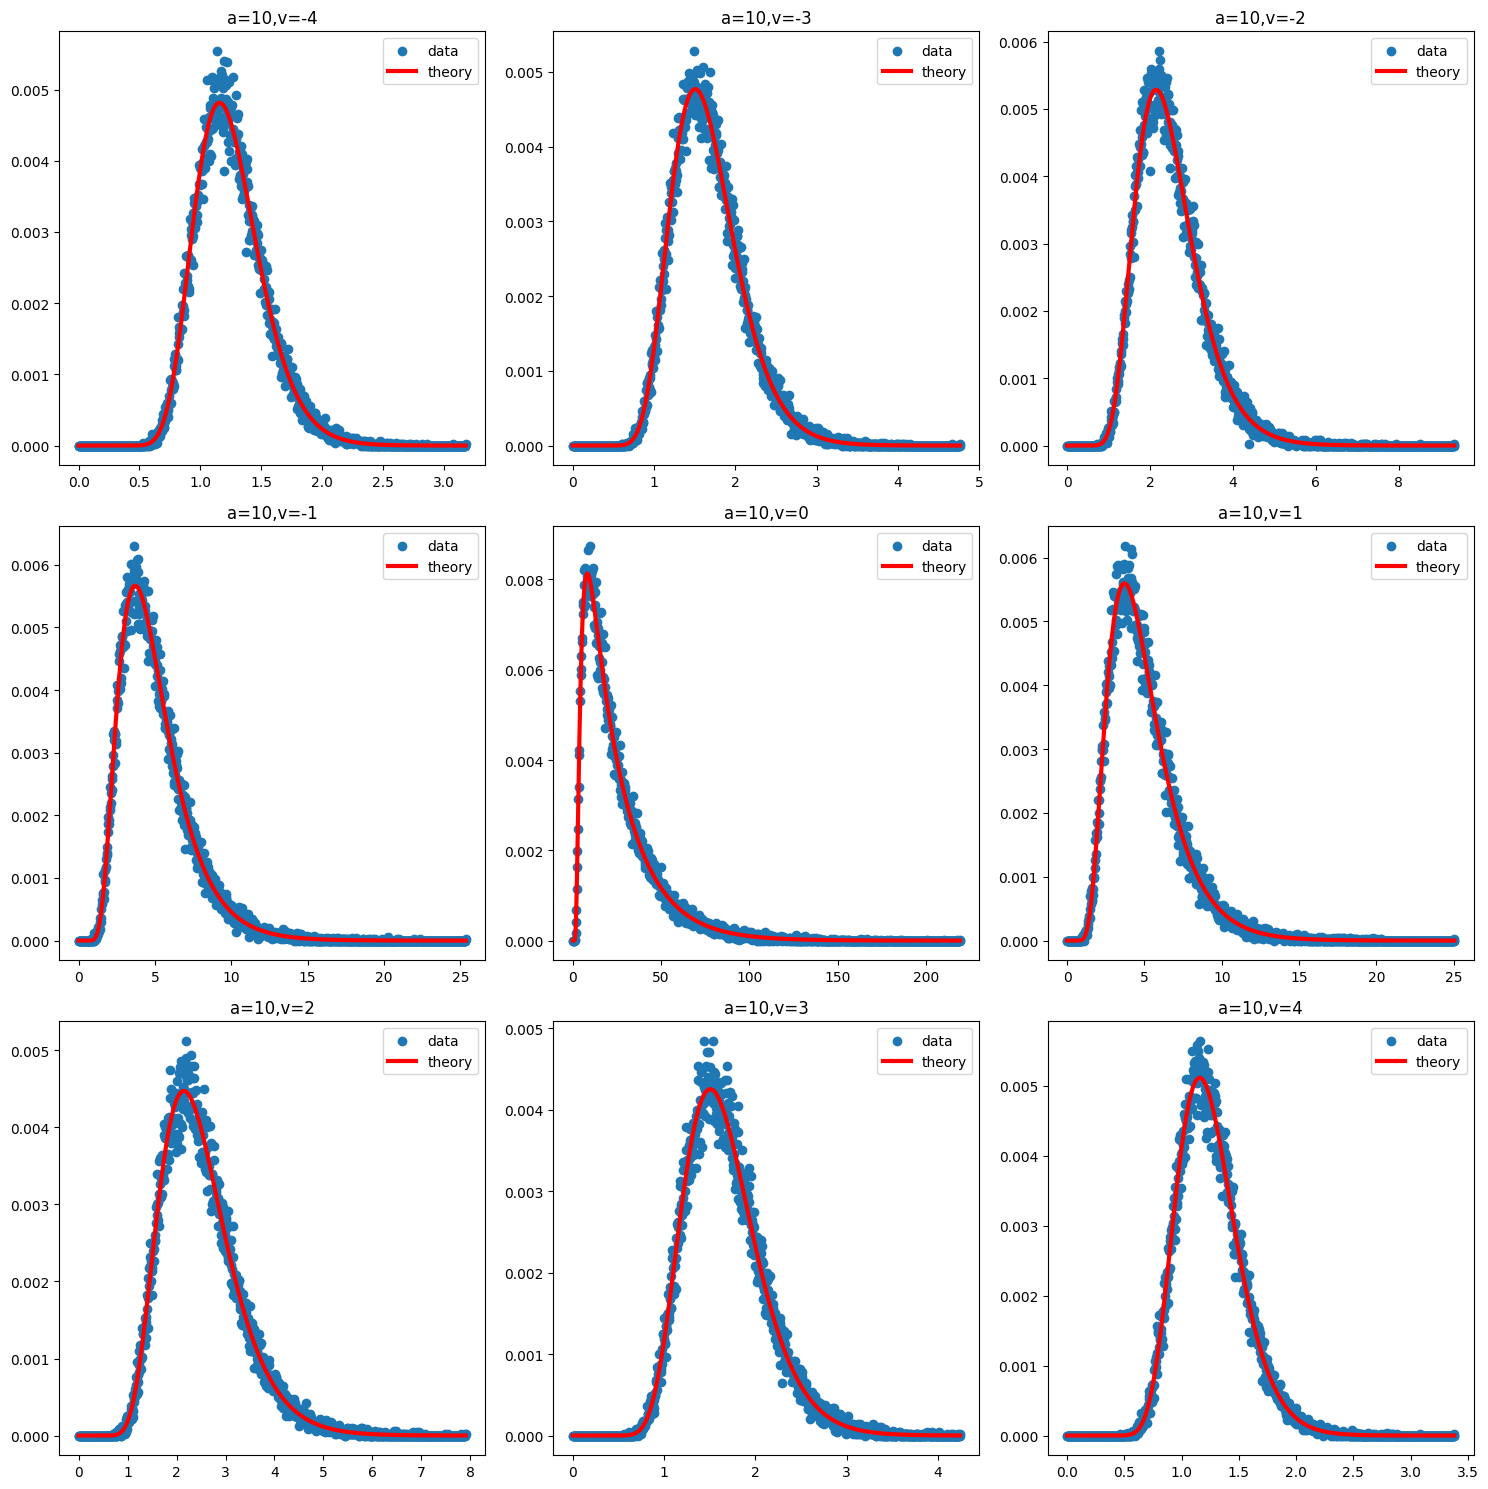

In [11]:
w = 0.5; K_max = 100
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
i = 0
for a in bound_arr:
    for v in velocity_arr:
        if a != 10:
            continue
        # if v == 0:
        #     continue
        keyname = f"a={str(a)},v={str(v)}"
        choices, RTs = parse_sim_results(all_sim_results[keyname])        
        
        t_pts = np.linspace(0.0001, max(RTs), 1000)
        prob = calculate_histogram(t_pts, RTs)
        RT_theory = prob_rt_a(t_pts, v, a, w) + prob_rt_a(t_pts, -v, a, 1-w)

        axes[i//3, i%3].scatter(t_pts[:-1], prob); 
        axes[i//3, i%3].plot(t_pts[:-1], RT_theory,linewidth=3, color='red');
        axes[i//3, i%3].set_title(keyname); 
        axes[i//3, i%3].legend(['data', 'theory'])
        i += 1

plt.tight_layout()
plt.show()


In [34]:
w = 0.5
prob_r_a_v = np.zeros((len(bound_arr), len(velocity_arr)))
count_r_data = np.zeros((len(bound_arr), len(velocity_arr)))
for i,a in enumerate(bound_arr):
    for j,v in enumerate(velocity_arr):
        prob_r_a_v[i,j] = 1 - prob_hit_low_bound(v,a,w)

        keyname = f"a={str(a)},v={str(v)}"
        choices, RTs = parse_sim_results(all_sim_results[keyname])
        # if a == 2:
        #     print(choices.count(1), len(choices))
        count_r_data[i,j] = choices.count(1)

# Fitting Choice

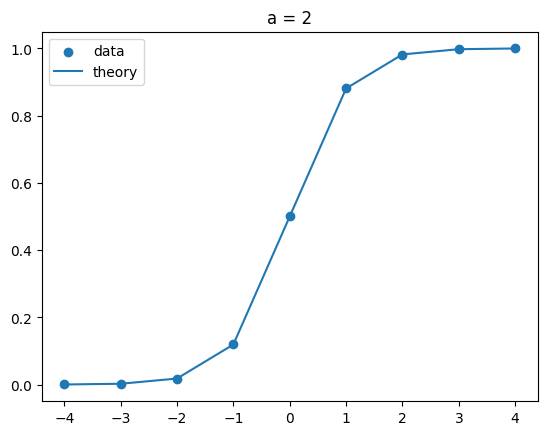

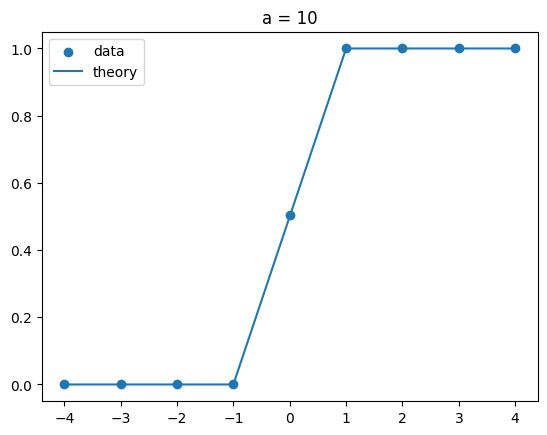

In [35]:
plt.figure()
plt.scatter(velocity_arr,count_r_data[0,:]/N_sim); plt.plot(velocity_arr, prob_r_a_v[0,:]); plt.title('a = 2'); plt.legend((['data', 'theory']));
plt.figure()
plt.scatter(velocity_arr,count_r_data[1,:]/N_sim); plt.plot(velocity_arr, prob_r_a_v[1,:]); plt.title('a = 10'); plt.legend((['data', 'theory']));